In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pydicom
!pip install tf-explain
!pip install seaborn
# !pip install -q -U segmentation-models-pytorch albumentations > /dev/null

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import os
import glob as gb
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import pydicom
from PIL import Image
import pandas as pd
import pydicom as dicom
from pydicom.data import get_testdata_file
#plt.imshow(pixel_array_numpy,cmap=plt.cm.bone)
from keras.layers import Conv2DTranspose, Cropping2D
from tensorflow.image import resize


In [4]:
# folder_path ='./Skull/'
# # Lặp qua tất cả các tệp trong thư mục
# for folder in tqdm(os.listdir(folder_path)):
#     for filename in tqdm(os.listdir(folder_path+folder)):
#         #print(filename)
#         if filename.startswith('Slice_') and filename.endswith('.png'):
#         # Lấy số từ tên tệp
#             number = int(filename.split('_')[1].split('.')[0])
            
#             # Định dạng lại số để có độ dài 6 chữ số
#             padded_number = f"{number:06d}"
            
#             # Đổi tên tệp thành 000001, 000002, ...
#             new_filename = f"{padded_number}.png"
#             #print(new_filename)
#             #print("Đã vào")
#             os.rename(os.path.join(folder_path+folder, filename), os.path.join(folder_path+folder, new_filename))

In [5]:
# Path to the directory containing the DICOM files
CT_PATH = '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train'

In [6]:
folders_dcm = os.listdir(CT_PATH)
sorted_folders_dcm = sorted(folders_dcm)
dcm_train = []
for folder in tqdm(sorted_folders_dcm):
    path_to_dicom_folder = os.path.join(CT_PATH, folder)
    files = os.listdir(path_to_dicom_folder)
    dcm_files = [os.path.join(path_to_dicom_folder, f) for f in files if f.endswith('.dcm')]
    #print(dcm_files)
    metadata = []
    for f in dcm_files:
        dcm = pydicom.dcmread(f)
        metadata.append((int(dcm.InstanceNumber), f))

    sorted_files = [f for i, f in sorted(metadata)]
    print(sorted_files)
    
    for f in sorted_files:
        ds = pydicom.dcmread(f)
        dcm_train.append(f)
    # for f in sorted_files:
    #     ds = pydicom.dcmread(f)
    #     new_image = ds.pixel_array.astype(float)
    #     scaled_image = (np.maximum(new_image, 0) / new_image.max()) * 255.0
    #     scaled_image = np.uint8(scaled_image)
    #     final_image = Image.fromarray(scaled_image)
    #     print(f)
    #     final_image.show()

  0%|          | 0/4 [00:00<?, ?it/s]

['/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0190/000000.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0190/000001.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0190/000002.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0190/000003.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0190/000004.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0190/000005.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0190/000006.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0190/0000

 25%|██▌       | 1/4 [00:05<00:16,  5.66s/it]

['/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0194/000000.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0194/000044.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0194/000001.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0194/000133.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0194/000002.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0194/000038.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0194/000043.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0194/0000

 50%|█████     | 2/4 [00:09<00:08,  4.49s/it]

['/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0195/000066.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0195/000008.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0195/000041.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0195/000070.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0195/000015.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0195/000087.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0195/000078.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0195/0000

 75%|███████▌  | 3/4 [00:16<00:05,  5.79s/it]

['/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0198/000077.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0198/000124.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0198/000024.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0198/000106.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0198/000056.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0198/000097.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0198/000015.dcm', '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/CT_train/HNSCC-01-0198/0001

100%|██████████| 4/4 [00:22<00:00,  5.60s/it]


In [7]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
X_train=[]
for file in tqdm(dcm_train):
    ds = dicom.dcmread(file)
    img = ds.pixel_array
    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH)) 
    img = img/255
    X_train.append(list(img))

100%|██████████| 633/633 [00:03<00:00, 165.21it/s]


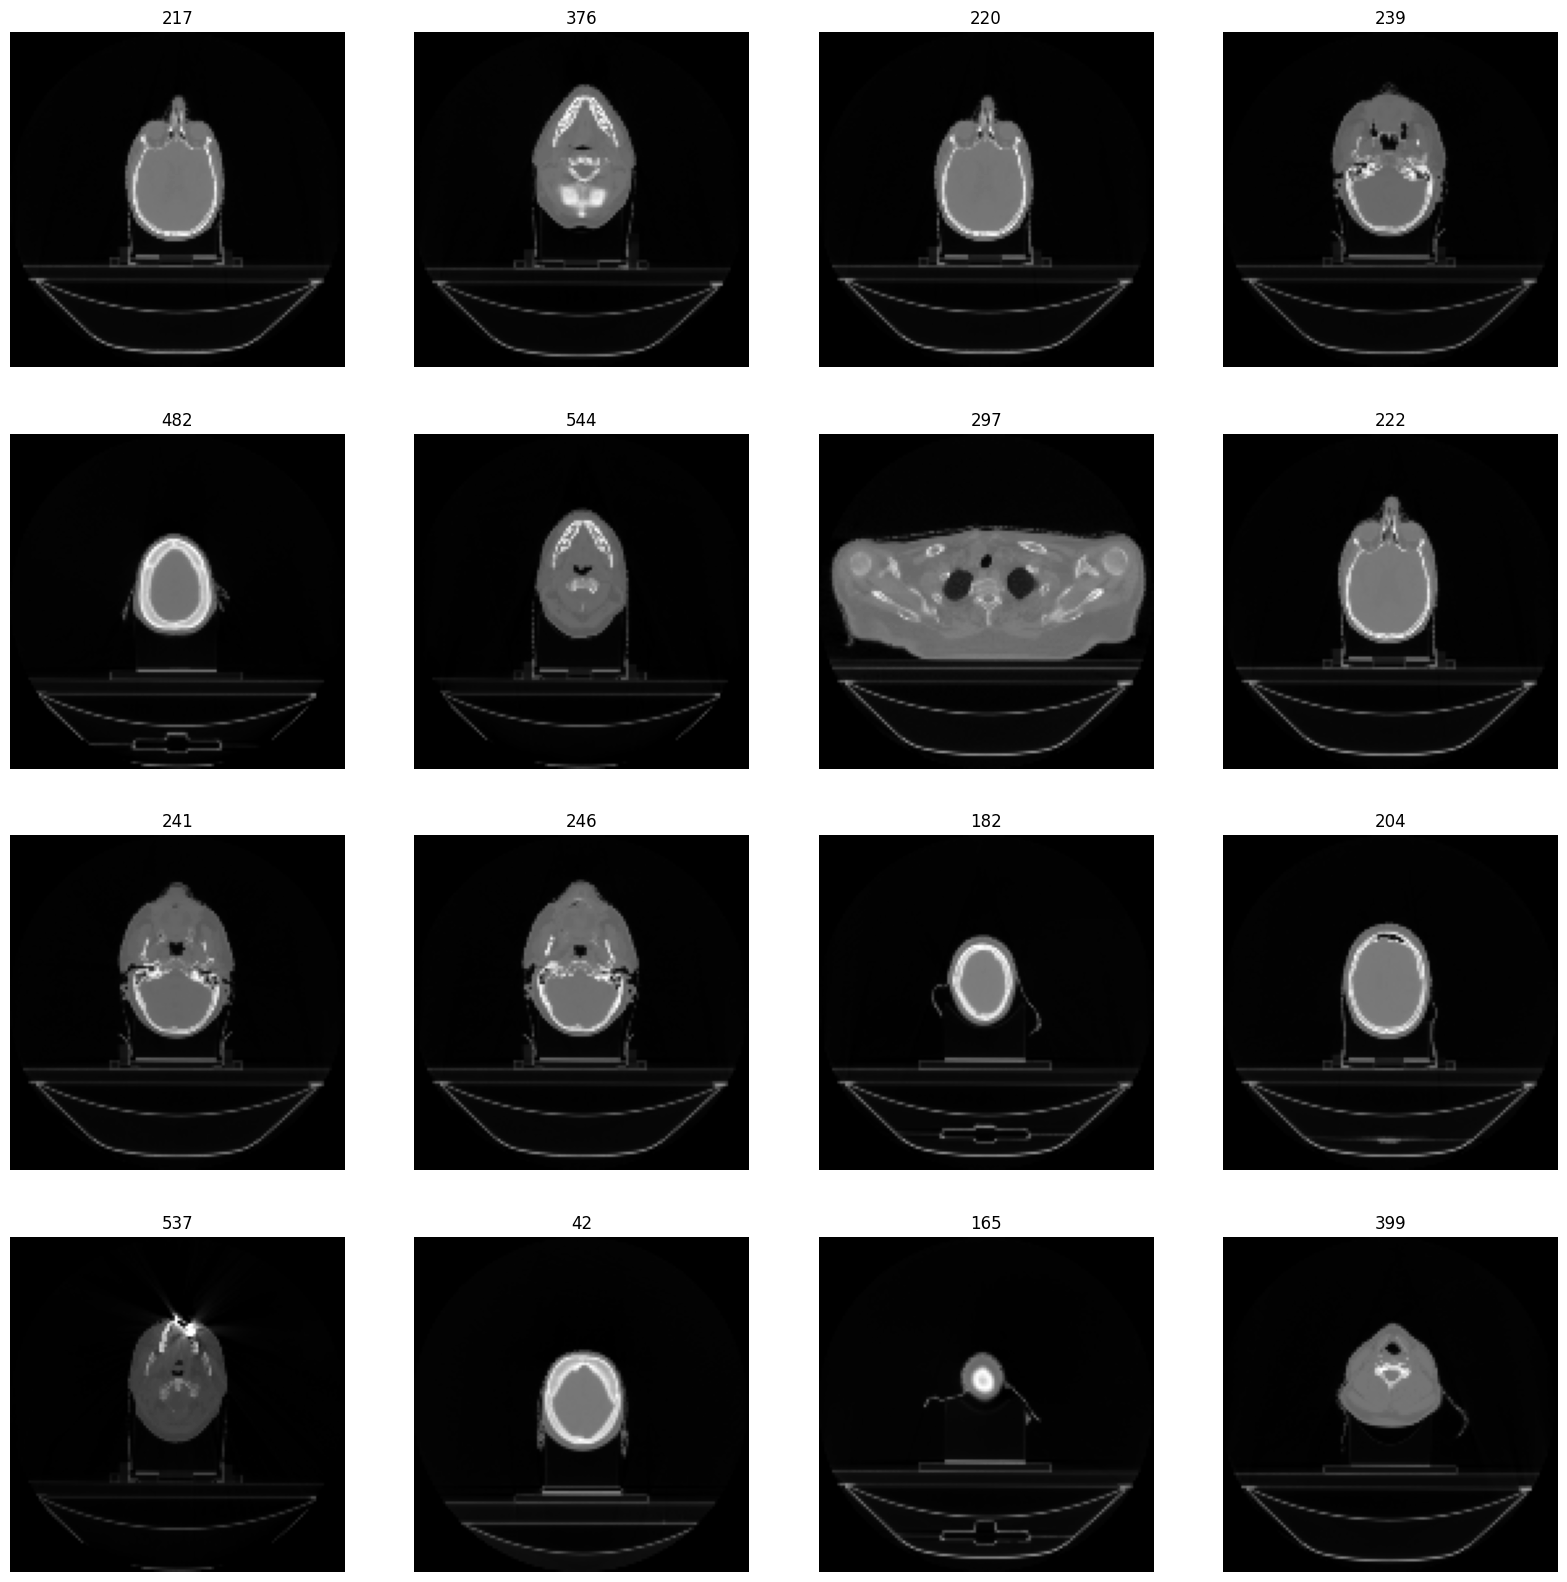

In [8]:
plt.figure(figsize=(20,20))
for n ,i in enumerate(list(np.random.randint(0,len(X_train),16))) :
    plt.subplot(4,4,n+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.axis('off')
    plt.title(i)

In [9]:
SKULL = '/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/Skull_sorted'

In [10]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 1

Y_train=[]
folders_skull = os.listdir(SKULL)
sorted_folders_skull = sorted(folders_skull)
for folder in tqdm(os.listdir(SKULL)):
    folder_path = os.path.join(SKULL, folder)
    valid_files = [file for file in os.listdir(folder_path) if file.startswith("000") and file.endswith(".png")]
    valid_files = sorted(valid_files)
    for file in valid_files :
        file = os.path.join(folder_path, file)
        # print(file)
        img =cv2.imread(file,0)
        img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))  
        img = img/255
        Y_train.append(list(img))

100%|██████████| 4/4 [00:06<00:00,  1.74s/it]


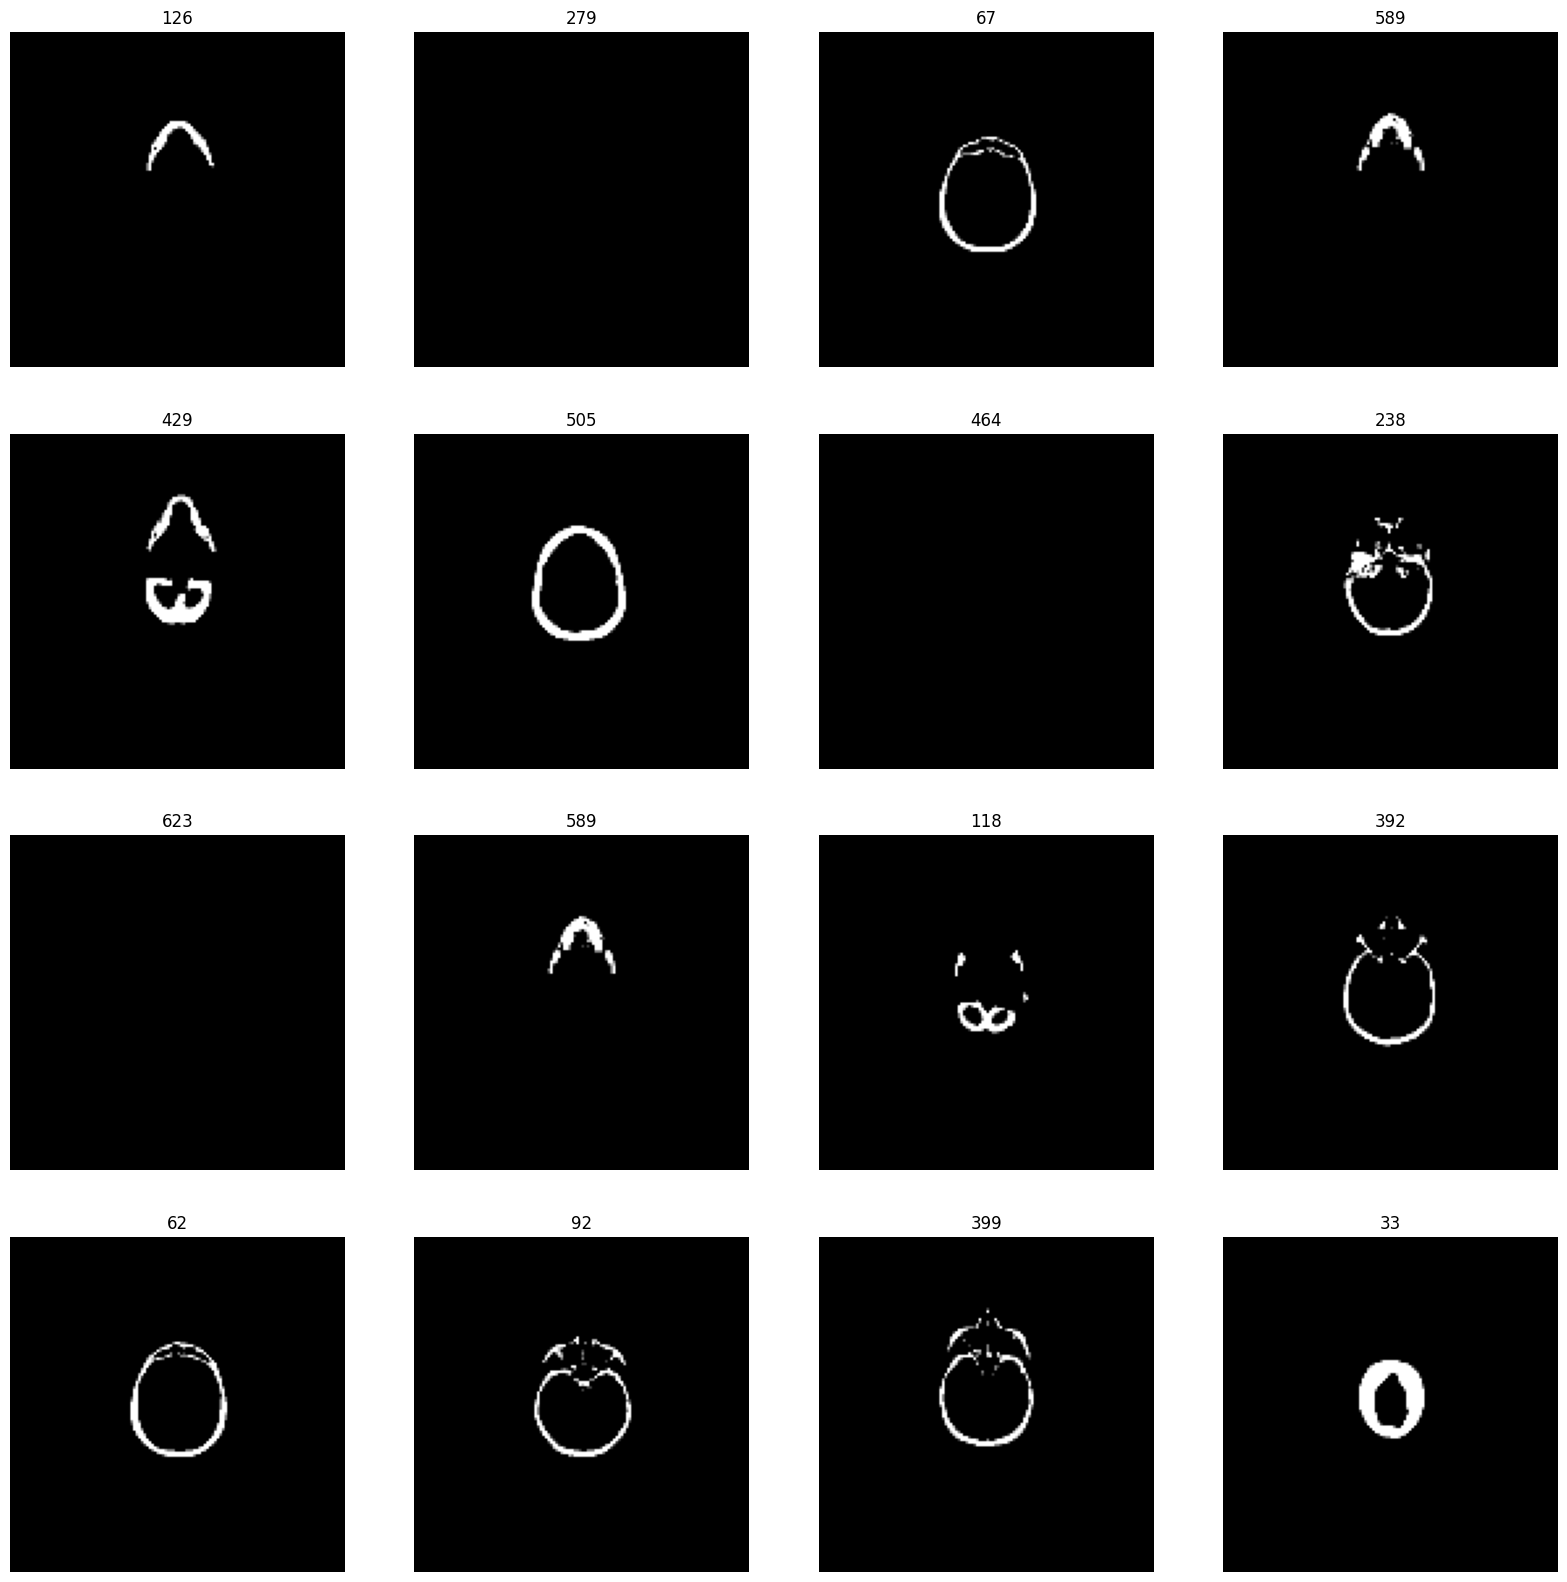

In [11]:
plt.figure(figsize=(20,20))
for n ,i in enumerate(list(np.random.randint(0,len(Y_train),16))) :
    plt.subplot(4,4,n+1)
    plt.imshow(Y_train[i],cmap='gray')
    plt.axis('off')
    plt.title(i)

In [12]:
print(len(X_train))
print(len(Y_train))

633
633


In [13]:
import matplotlib.pyplot as plt

for i in range(1, 150):
    plt.figure(figsize=(15, 15))
    plt.axis('off')
    
    # X_train là ảnh đầu vào
    test_image = X_train[i]
    plt.subplot(1, 3, 1)
    plt.imshow(test_image)
    plt.title(i, fontsize=14)
    plt.axis('off')
    
    # Y_train là ảnh dự đoán
    test_mask = Y_train[i]
    plt.subplot(1, 3, 3)
    plt.imshow(test_mask, cmap='gray')
    plt.title(i, fontsize=14)
    plt.axis('off')
    
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [14]:
X_train=np.array(X_train)
Y_train=np.array(Y_train,np.bool_)

In [15]:
# X_train_1d = np.reshape(X_train, (-1,)) # Chuyển đổi X_train sang mảng 1 chiều
# Y_train_1d = np.reshape(Y_train, (-1,))

In [16]:
X_train.shape

(633, 128, 128)

In [17]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Conv2D , MaxPooling2D ,concatenate ,Input ,Dropout ,Conv2DTranspose
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

In [25]:
def unet(IMG_HEIGHT = 128, IMG_WIDTH =128, IMG_CHANNELS = 1):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    # s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c8)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    model.summary()
    
    return model

In [21]:
# from tensorflow.keras.optimizers import Adam
# def unet(input_size = (128,128,1)):
#     inputs = Input(input_size)
#     conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
#     conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
#     pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
#     conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
#     conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
#     pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
#     conv3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
#     conv3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
#     pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
#     conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
#     conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
#     pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
#     conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
#     conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
#     drop5 = Dropout(0.5)(conv5)
#     pool5 = MaxPooling2D(pool_size=(2, 2))(drop5)

#     conv6 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool5)
#     conv6 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
#     drop6 = Dropout(0.5)(conv5)

#     up6 = Conv2DTranspose(512,2,strides=(2,2),padding='same')(drop6)
#     merge6 = concatenate([drop6,up6], axis = 3)
#     conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
#     conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

#     up7 = Conv2DTranspose(256,2,strides=(2,2),padding='same')(conv6)
#     merge7 = concatenate([conv3,up7], axis = 3)
#     conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
#     conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

#     up8 = Conv2DTranspose(128,2,strides=(2,2),padding='same')(conv7)
#     merge8 = concatenate([conv2,up8], axis = 3)
#     conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
#     conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

#     up9 = Conv2DTranspose(64,2,strides=(2,2),padding='same')(conv8)
#     merge9 = concatenate([conv1,up9], axis = 3)
#     conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
#     conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)

#     up10 = Conv2DTranspose(32,2,strides=(2,2),padding='same')(conv9)
#     merge10 = concatenate([conv1,up9], axis = 3)
#     conv10 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge10)
#     conv10 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv10)

#     conv10 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv10)

#     outputs = Conv2D(1, kernel_size=1, activation='sigmoid')(conv10)
     
#     model = Model(inputs=[inputs], outputs=[outputs])
#     model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#     model.summary()
#     return model

In [26]:
model=unet()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_22 (Conv2D)             (None, 128, 128, 32  320         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_3 (Dropout)            (None, 128, 128, 32  0           ['conv2d_22[0][0]']              
                                )                                                             

In [27]:
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint

EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=0.00001)
model_check=ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/model.hdf5',monitor='val_loss',verbose=1,save_best_only=True)
callback=[EarlyStop , Reduce_LR,model_check]

In [28]:
history=model.fit(X_train,Y_train,validation_split=0.1,batch_size=64,steps_per_epoch=len(X_train)//64,epochs=10,callbacks=callback,verbose=1)

Epoch 1/10
9/9 [==============================] - ETA: 0s - loss: 0.7301 - accuracy: 0.6938
Epoch 1: val_loss improved from inf to 0.69755, saving model to /content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/model.hdf5
9/9 [==============================] - 39s 2s/step - loss: 0.7301 - accuracy: 0.6938 - val_loss: 0.6976 - val_accuracy: 0.5887 - lr: 0.0010
Epoch 2/10
9/9 [==============================] - ETA: 0s - loss: 0.5694 - accuracy: 0.7466
Epoch 2: val_loss improved from 0.69755 to 0.69576, saving model to /content/drive/MyDrive/Colab Notebooks/Chuyên đề chuyên sâu TTNT2/Data_Segmentation/model.hdf5
9/9 [==============================] - 3s 333ms/step - loss: 0.5694 - accuracy: 0.7466 - val_loss: 0.6958 - val_accuracy: 0.5687 - lr: 0.0010
Epoch 3/10
9/9 [==============================] - ETA: 0s - loss: 0.5377 - accuracy: 0.7498
Epoch 3: val_loss improved from 0.69576 to 0.68575, saving model to /content/drive/MyDrive/Colab Notebooks/Chu

In [29]:
y_pred =model.predict(X_train)

20/20 [==============================] - 4s 94ms/step


In [30]:
y_pred =(y_pred > 0.5).astype(np.uint8)

<ipython-input-49-9695f44dee5b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


(-0.5, 127.5, 127.5, -0.5)

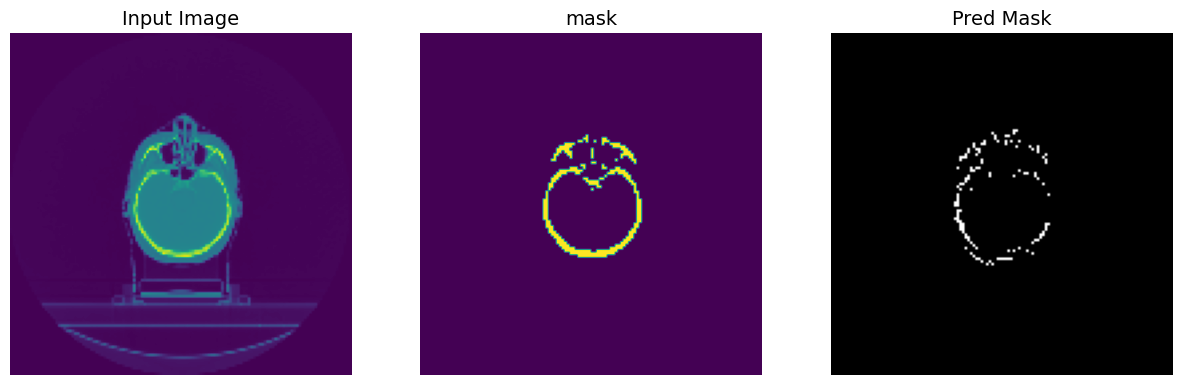

In [49]:
plt.figure(figsize=(15,15))
plt.axis('Off')
test_image = X_train[90]
plt.subplot(1,3,1)
plt.imshow(test_image)
plt.title('Input Image', fontsize=14)
plt.axis('off')

test_image = Y_train[90]
plt.subplot(1,3,2)
plt.imshow(test_image)
plt.title('mask', fontsize=14)
plt.axis('off')

test_mask = y_pred[90]
plt.subplot(1,3,3)
plt.imshow(test_mask, cmap='gray')
plt.title('Pred Mask', fontsize=14)
plt.axis('off')

<ipython-input-47-4c900d8ae7d9>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_images, 3, index*3+1)


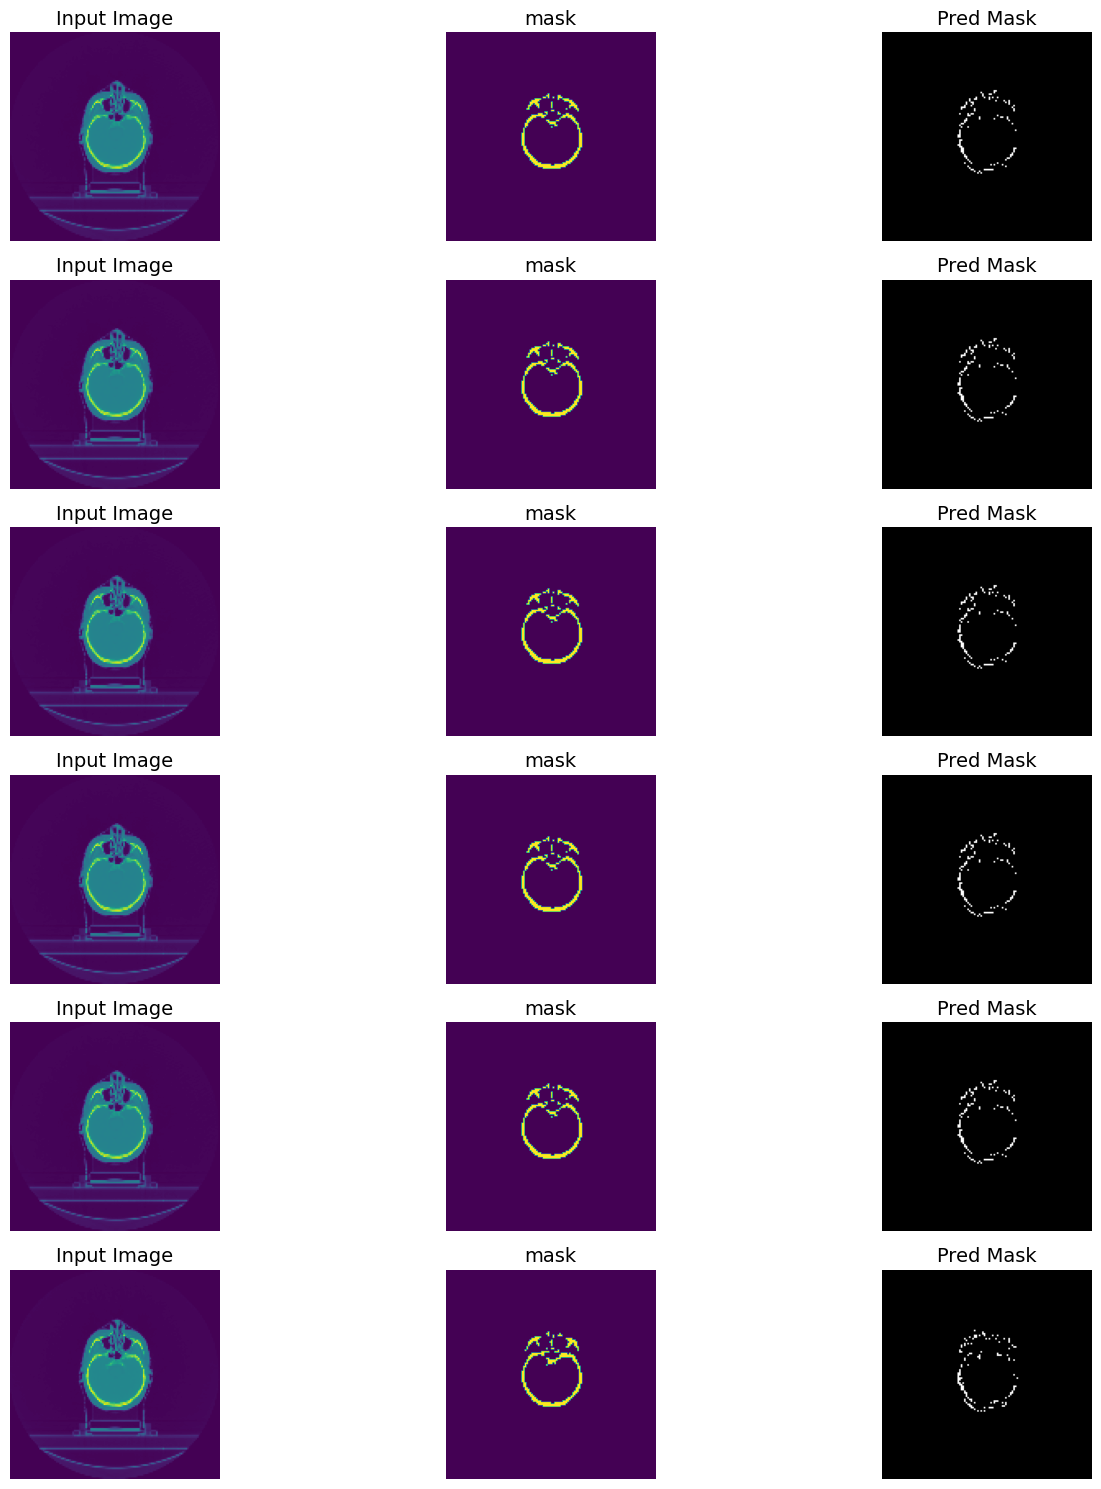

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.axis('off')

start_index = 90
end_index = 95

num_images = end_index - start_index + 1

for i in range(start_index, end_index+1):
    index = i - start_index
    
    test_image = X_train[i]
    plt.subplot(num_images, 3, index*3+1)
    plt.imshow(test_image)
    plt.title('Input Image', fontsize=14)
    plt.axis('off')

    test_image = Y_train[i]
    plt.subplot(num_images, 3, index*3+2)
    plt.imshow(test_image)
    plt.title('mask', fontsize=14)
    plt.axis('off')

    test_mask = y_pred[i]
    plt.subplot(num_images, 3, index*3+3)
    plt.imshow(test_mask, cmap='gray')
    plt.title('Pred Mask', fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()